In [1]:
# Library imports
import scipy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def evaluate(t, y):
    NBodies = int(len(y)/6)
    solved_vector = np.zeros(y.size)
    
    for i in range(NBodies):
        ioffset = i*6
        solved_vector[ioffset:ioffset+3] = y[ioffset+3:ioffset+6]
        for j in range(NBodies):
            joffset = j*6
            
            
            if i != j:
                d = y[ioffset:ioffset+3] - y[joffset:joffset+3]
                r = np.sqrt(np.sum(d**2))
                a = d*G*masses[j]/(r**3)
                solved_vector[ioffset+3:ioffset+6] += a
    
    return solved_vector

In [3]:
def rk4(t,dt,y,evaluate):
    k1 = dt * evaluate(t, y) 
    k2 = dt * evaluate(t + 0.5*dt, y + 0.5*k1)
    k3 = dt * evaluate(t + 0.5*dt, y + 0.5*k2)
    k4 = dt * evaluate(t + dt, y + k3)
    
    y_new = y + (1/6.)*(k1+ 2*k2 + 2*k3 + k4)
    
    return y_new

In [4]:
def run(T, dt, y0, masses, evaluate, t0 = 0):
    nsteps = int((T-t0)/dt)
    history = np.empty((nsteps+1, len(y0)))
    history[0, :] = y0
    
    t = t0
    for i in range(nsteps):
        history[i+1] = rk4(t, dt, history[i,:], evaluate) 
        t += dt
    
    return history

In [5]:
def getEnergyAndAMomentum(y, masses):
    v = getVelocities(y).copy().reshape((-1,6))[:,:3]
    m = masses.copy().reshape((-1,1))
    KE = 0.5 * np.sum(np.sum( m * v**2 ))
    
    
    yAux = y.copy().reshape((-1,6))
    
    
    x = yAux[:,0].reshape(-1, 1)
    y = yAux[:,1].reshape(-1, 1)
    z = yAux[:,2].reshape(-1, 1)
    
    dx = x.T - x
    dy = y.T - y
    dz = z.T - z
    
    
    inv_r = np.sqrt(dx**2 + dy**2 + dz**2)
    inv_r[inv_r>0] = 1.0/inv_r[inv_r>0]

    PE = G * np.sum(np.sum(np.triu(-(m*m.T)*inv_r,1)))
    
    
    return KE, PE

In [9]:
# Variable declaration 1
G = -6.67*(10**-11)
t0 = 0
T = 6.221e6
dt = 3600  
y0 = np.array([3.84e8, 0, 0, 0, 1000, 0,
               0, 0, 0, 0, 0, 0])
masses = np.array([7.347e22, 5.97e24])

In [7]:
# Variable declaration 2 -> Saturn, Janus and Epithemeus
G = -6.67*(10**-11)
t0 = 0
T = 6.221e6
dt = 360
y0 = np.array([0, 0, 0, 0, 0, 0,                                  #Saturn
               0.11e9, 0.93e8, -0.17e8, -0.99e4, 0.12e6, -0.8e-4, #Janus
              0.19e8, -0.14e9,0.15e8,0.16e6, 0.17e4, -0.15e4])    #Epithemeus
masses = np.array([5.68e26, 1.89e18, 5.26e17])

In [8]:
# Variable declaration 4 -> figure 8
G = -1
t0 = 0
T = 5
dt = 0.1
y0 = np.array([0.97000436, -0.24308753, 0,  0.93240737/2, 0.86473146/2, 0,
                -0.97000436, 0.24308753,0, 0.93240737/2, 0.86473146/2, 0,
                0,0,0,-0.93240737,  -0.86473146,0])
masses = np.array([1, 1, 1])

In [10]:
# Calculation
history = run(T, dt, y0, masses, evaluate)

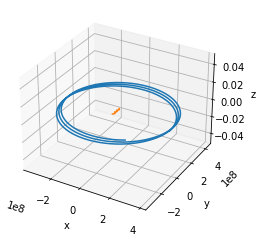

In [12]:
# Plot the results
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.plot3D(history[:,0], history[:,1], history[:,2])
ax.plot3D(history[:,6], history[:,7], history[:,8])
# ax.plot3D(history[:,12], history[:,13], history[:,14])

In [16]:
history[20]

array([ 3.77018876e+08,  7.15629893e+07,  0.00000000e+00, -1.93407103e+02,
        9.81804122e+02,  0.00000000e+00,  8.59134328e+04,  5.37808689e+03,
        0.00000000e+00,  2.38017083e+00,  2.23928163e-01,  0.00000000e+00])